In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import os

class ExtractData():
    def __int__(self, path_to_numpys='Montesinos/'):
        pass
    def convert(self, filelist):
        self.col_names=['datetime', 'periodo', ' None1', 'None2', 'infractions','noice']
        data = np.load(self.path+filelist)
        dataframe = pd.DataFrame(data, columns=self.col_names)
        return dataframe
    
    def run(self):
        self.path = 'Montesinos/'
        self.files = os.listdir(self.path)
        data = []

        for file in self.files:
            dataframe = self.convert(file)
            data.append(dataframe)
        return data

In [3]:
path_to_numpys = 'Montesinos/'
worker = ExtractData()
data_frames = worker.run()

In [4]:
data_frames

[                        datetime  periodo  None1 None2 infractions noice
 0     2018-02-04 01:36:04.936250       60      0     0           0     0
 1     2018-02-04 01:37:00.188437       60      0     2           0     1
 2     2018-02-04 01:38:00.103528       60      2     1           0     5
 3     2018-02-04 01:39:00.129788       60      1     1           0     2
 4     2018-02-04 01:40:00.025635       60      0     2           0     3
 5     2018-02-04 01:41:00.139371       60      1     3           0     1
 6     2018-02-04 01:42:00.051366       60      2     1           0     0
 7     2018-02-04 01:43:00.025051       60      1     0           0     1
 8     2018-02-04 01:44:00.045792       60      2     1           0     2
 9     2018-02-04 01:45:00.098612       60      1     0           0     4
 10    2018-02-04 01:46:00.179769       60      1     2           0     4
 11    2018-02-04 01:47:00.062975       60      1     0           0     3
 12    2018-02-04 01:48:00.125661     

In [5]:
df = pd.concat(data_frames)
df = df.drop(['noice','periodo','None2', ' None1'], axis=1)
df['infractions'] = df['infractions'].astype(int)
df.head()


,datetime,infractions
0,2018-02-04 01:36:04.936250,0
1,2018-02-04 01:37:00.188437,0
2,2018-02-04 01:38:00.103528,0
3,2018-02-04 01:39:00.129788,0
4,2018-02-04 01:40:00.025635,0


In [6]:
df['TimeStamp'] = [str(date).split('.')[0] for date in df['datetime'].tolist()]
df.head(10)

,datetime,infractions,TimeStamp
0,2018-02-04 01:36:04.936250,0,2018-02-04 01:36:04
1,2018-02-04 01:37:00.188437,0,2018-02-04 01:37:00
2,2018-02-04 01:38:00.103528,0,2018-02-04 01:38:00
3,2018-02-04 01:39:00.129788,0,2018-02-04 01:39:00
4,2018-02-04 01:40:00.025635,0,2018-02-04 01:40:00
5,2018-02-04 01:41:00.139371,0,2018-02-04 01:41:00
6,2018-02-04 01:42:00.051366,0,2018-02-04 01:42:00
7,2018-02-04 01:43:00.025051,0,2018-02-04 01:43:00
8,2018-02-04 01:44:00.045792,0,2018-02-04 01:44:00
9,2018-02-04 01:45:00.098612,0,2018-02-04 01:45:00


In [7]:
datetime_rowid = df['TimeStamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid
df.head(30)

,datetime,infractions,TimeStamp
TimeStamp,,,
2018-02-04 01:36:04,2018-02-04 01:36:04.936250,0,2018-02-04 01:36:04
2018-02-04 01:37:00,2018-02-04 01:37:00.188437,0,2018-02-04 01:37:00
2018-02-04 01:38:00,2018-02-04 01:38:00.103528,0,2018-02-04 01:38:00
2018-02-04 01:39:00,2018-02-04 01:39:00.129788,0,2018-02-04 01:39:00
2018-02-04 01:40:00,2018-02-04 01:40:00.025635,0,2018-02-04 01:40:00
2018-02-04 01:41:00,2018-02-04 01:41:00.139371,0,2018-02-04 01:41:00
2018-02-04 01:42:00,2018-02-04 01:42:00.051366,0,2018-02-04 01:42:00
2018-02-04 01:43:00,2018-02-04 01:43:00.025051,0,2018-02-04 01:43:00
2018-02-04 01:44:00,2018-02-04 01:44:00.045792,0,2018-02-04 01:44:00


In [8]:

# Drop datetime coumn name
df2 = df.drop('datetime', 1)

df2.head()

,infractions,TimeStamp
TimeStamp,,
2018-02-04 01:36:04,0,2018-02-04 01:36:04
2018-02-04 01:37:00,0,2018-02-04 01:37:00
2018-02-04 01:38:00,0,2018-02-04 01:38:00
2018-02-04 01:39:00,0,2018-02-04 01:39:00
2018-02-04 01:40:00,0,2018-02-04 01:40:00


Text(0,0.5,'Infracctions over a month')

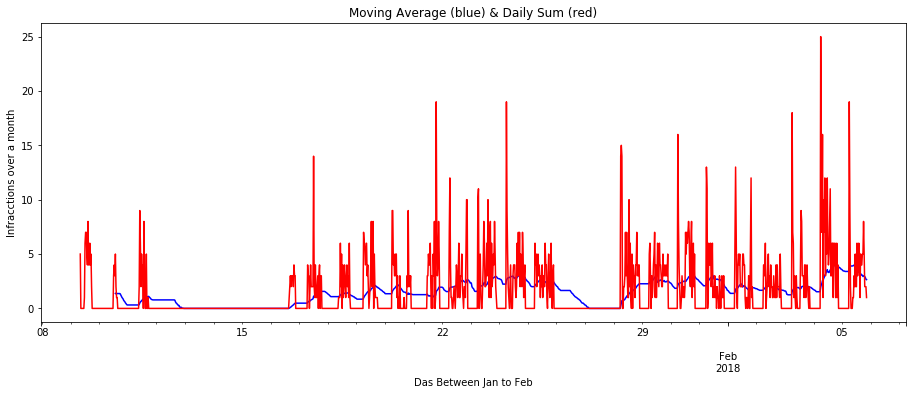

In [9]:
hourly = df2['infractions'].resample('30T')
hourly_sum = hourly.sum()
fig = plt.figure(figsize=(15.5, 5.5))
ax = fig.add_subplot(1,1,1)
moving_average = hourly_sum.rolling(window=60).mean()
moving_average.plot(ax=ax, color='b')
hourly_sum.plot(ax=ax, color='r')
ax.set_title('Moving Average (blue) & Daily Sum (red)')
ax.set_xlabel('Das Between Jan to Feb')
ax.set_ylabel('Infracctions over a month')
#plt.savefig('plots/ch2/B07887_02_17.png', format='png', dpi=300)

In [10]:
print(len(df2))
print(len(hourly_sum))
print(len(moving_average))
df_average = moving_average.to_frame()
df_average = df_average.fillna(0)

39296
1322
1322


/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


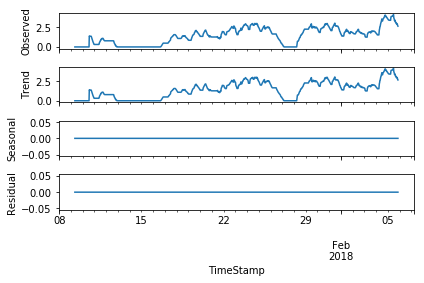

In [11]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(df_average['infractions'],freq = 1 , model="additive")
resplot = res.plot()

/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """
/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  import sys


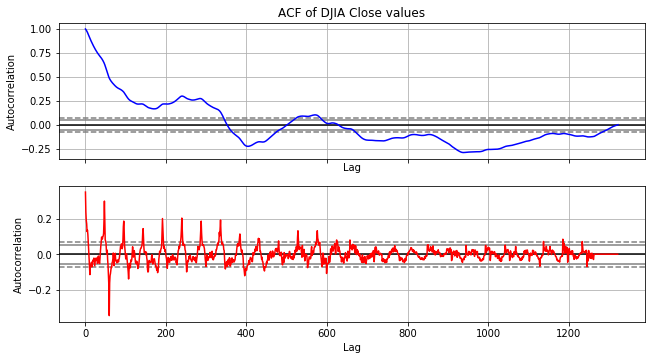

In [12]:
from pandas.tools.plotting import autocorrelation_plot

fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(10.5, 5.5)
autocorrelation_plot(df_average['infractions'], color='b', ax=ax[0])
ax[0].set_title('ACF of DJIA Close values')
autocorrelation_plot(df_average['infractions'].diff(1).iloc[1:], color='r', ax=ax[1])

/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Text(0.5,1,'Box plot of Air Pressure')

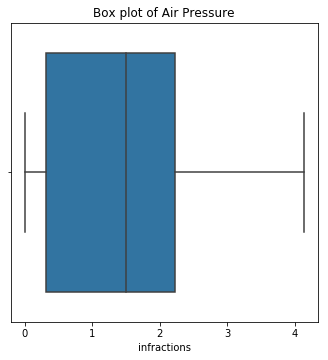

In [13]:
# Box plots
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df_average['infractions'])
g.set_title('Box plot of Air Pressure')

/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average infractions')

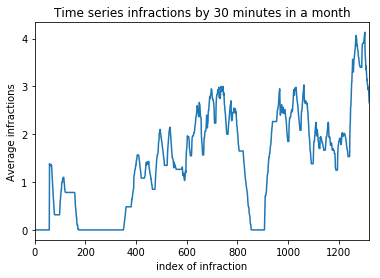

In [14]:
g = sns.tsplot(df_average['infractions'])
g.set_title('Time series infractions by 30 minutes in a month')
g.set_xlabel('index of infraction')
g.set_ylabel('Average infractions')

In [15]:
# Scalte to -1 , 1  range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

df_average['infractions_scaled'] = scaler.fit_transform(np.array(df_average['infractions']).reshape(-1, 1))

/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [16]:
df_average['TimeStamp'] = df_average.index
df_average

,infractions,infractions_scaled,TimeStamp
TimeStamp,,,
2018-01-09 08:00:00,0.000000,0.000000,2018-01-09 08:00:00
2018-01-09 08:30:00,0.000000,0.000000,2018-01-09 08:30:00
2018-01-09 09:00:00,0.000000,0.000000,2018-01-09 09:00:00
2018-01-09 09:30:00,0.000000,0.000000,2018-01-09 09:30:00
2018-01-09 10:00:00,0.000000,0.000000,2018-01-09 10:00:00
2018-01-09 10:30:00,0.000000,0.000000,2018-01-09 10:30:00
2018-01-09 11:00:00,0.000000,0.000000,2018-01-09 11:00:00
2018-01-09 11:30:00,0.000000,0.000000,2018-01-09 11:30:00
2018-01-09 12:00:00,0.000000,0.000000,2018-01-09 12:00:00


In [17]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
import datetime
split_date = datetime.datetime(year=2018, month=2, day=1, hour=0)
df_train = df_average.loc[df_average['TimeStamp']<split_date]
df_val = df_average.loc[df_average['TimeStamp']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (1088, 3)
Shape of test: (234, 3)


In [18]:
#First five rows of train
df_train.reset_index(drop=True, inplace=True)
df_train.head()

,infractions,infractions_scaled,TimeStamp
0,0.0,0.0,2018-01-09 08:00:00
1,0.0,0.0,2018-01-09 08:30:00
2,0.0,0.0,2018-01-09 09:00:00
3,0.0,0.0,2018-01-09 09:30:00
4,0.0,0.0,2018-01-09 10:00:00


In [19]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)
#First five rows of validation
df_val.head()


,infractions,infractions_scaled,TimeStamp
0,1.650000,0.399194,2018-02-01 00:00:00
1,1.600000,0.387097,2018-02-01 00:30:00
2,1.500000,0.362903,2018-02-01 01:00:00
3,1.466667,0.354839,2018-02-01 01:30:00
4,1.383333,0.334677,2018-02-01 02:00:00


/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, 

Text(0,0.5,'Scaled pm2.5 readings')

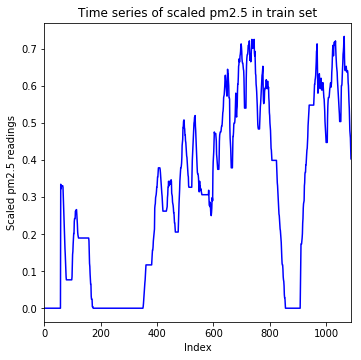

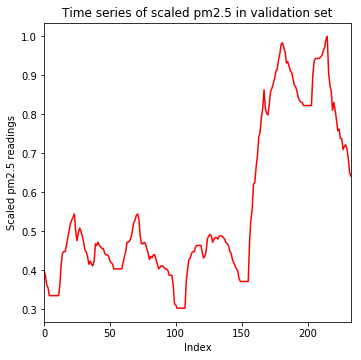

In [20]:
"""
The train and validation time series of scaled pm2.5 is also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['infractions_scaled'], color='b')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['infractions_scaled'], color='r')
g.set_title('Time series of scaled pm2.5 in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')



Now we need to generate regressors (X) and target variable (y) for train and validation. 2-D array of regressor and 1-D array of target is created from the original 1-D array of columm log_PRES in the DataFrames. For the time series forecasting model, Past seven days of observations are used to predict for the next day. This is equivalent to a AR(7) model. We define a function which takes the original time series and the number of timesteps in regressors as input to generate the arrays of X and y.


In [34]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [35]:
X_train, y_train = makeXy(df_train['infractions_scaled'], 30)
print('Shape of train arrays:', X_train.shape, y_train.shape)


Shape of train arrays: (1058, 30) (1058,)


In [36]:
X_val, y_val = makeXy(df_val['infractions_scaled'], 30)
print('Shape of validation arrays:', X_val.shape, y_val.shape)


Shape of validation arrays: (204, 30) (204,)




Now we define the MLP using the Keras Functional API. In this approach a layer can be declared as the input of the following layer at the time of defining the next layer.


In [37]:

from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint



In [38]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(30,), dtype='float32')


In [39]:
#Dense layers are defined with linear activation
dense1 = Dense(32, activation='tanh')(input_layer)
dense2 = Dense(16, activation='tanh')(dense1)
dense3 = Dense(16, activation='tanh')(dense2)




Multiple hidden layers and large number of neurons in each hidden layer gives neural networks the ability to model complex non-linearity of the underlying relations between regressors and target. However, deep neural networks can also overfit train data and give poor results on validation or test set. Dropout has been effectively used to regularize deep neural networks. In this example, a Dropout layer is added before the output layer. Dropout randomly sets p fraction of input neurons to zero before passing to the next layer. Randomly dropping inputs essentially acts as a bootstrap aggregating or bagging type of model ensembling. Random forest uses bagging by building trees on random subsets of input features. We use p=0.2 to dropout 20% of randomly selected input features.


In [40]:
dropout_layer = Dropout(0.2)(dense3)

In [41]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)





The input, dense and output layers will now be packed inside a Model, which is wrapper class for training and making predictions. The box plot of pm2.5 shows the presence of outliers. Hence, mean absolute error (MAE) is used as absolute deviations suffer less fluctuations compared to squared deviations.

The network's weights are optimized by the Adam algorithm. Adam stands for adaptive moment estimation and has been a popular choice for training deep neural networks. Unlike, stochastic gradient descent, adam uses different learning rates for each weight and separately updates the same as the training progresses. The learning rate of a weight is updated based on exponentially weighted moving averages of the weight's gradients and the squared gradients.


In [42]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,809
Trainable params: 1,809
Non-trainable params: 0
_________________________________________________________________



The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch, at which the loss function has been minimum.


In [43]:
save_weights_at = os.path.join('keras_models', 'Infracions_forecast_MLP_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=100,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 1058 samples, validate on 204 samples
Epoch 1/100
1058/1058 [==============================] - 1s 1ms/step - loss: 0.0812 - val_loss: 0.0874
Epoch 2/100
1058/1058 [==============================] - 0s 146us/step - loss: 0.0626 - val_loss: 0.0539
Epoch 3/100
1058/1058 [==============================] - 0s 188us/step - loss: 0.0473 - val_loss: 0.0463
Epoch 4/100
1058/1058 [==============================] - 0s 158us/step - loss: 0.0471 - val_loss: 0.0385
Epoch 5/100
1058/1058 [==============================] - 0s 165us/step - loss: 0.0429 - val_loss: 0.0521
Epoch 6/100
1058/1058 [==============================] - 0s 155us/step - loss: 0.0421 - val_loss: 0.0405
Epoch 7/100
1058/1058 [==============================] - 0s 180us/step - loss: 0.0378 - val_loss: 0.0381
Epoch 8/100
1058/1058 [==============================] - 0s 168us/step - loss: 0.0388 - val_loss: 0.0439
Epoch 9/100
1058/1058 [==============================] - 0s 164us/step - loss: 0.0387 - val_loss: 0.0403
Epoch 10/1

Epoch 78/100
1058/1058 [==============================] - 0s 169us/step - loss: 0.0289 - val_loss: 0.0347
Epoch 79/100
1058/1058 [==============================] - 0s 197us/step - loss: 0.0282 - val_loss: 0.0336
Epoch 80/100
1058/1058 [==============================] - 0s 206us/step - loss: 0.0285 - val_loss: 0.0383
Epoch 81/100
1058/1058 [==============================] - 0s 221us/step - loss: 0.0276 - val_loss: 0.0569
Epoch 82/100
1058/1058 [==============================] - 0s 236us/step - loss: 0.0291 - val_loss: 0.0553
Epoch 83/100
1058/1058 [==============================] - 0s 189us/step - loss: 0.0282 - val_loss: 0.0334
Epoch 84/100
1058/1058 [==============================] - 0s 195us/step - loss: 0.0265 - val_loss: 0.0314
Epoch 85/100
1058/1058 [==============================] - 0s 188us/step - loss: 0.0292 - val_loss: 0.0305
Epoch 86/100
1058/1058 [==============================] - 0s 197us/step - loss: 0.0247 - val_loss: 0.0331
Epoch 87/100
1058/1058 [======================



Prediction are made for the pm2.5 from the best saved model. The model's predictions, which are on the scaled pm2.5, are inverse transformed to get predictions of original pm2.5.


In [44]:
best_model = load_model(os.path.join('keras_models', 'Infracions_forecast_MLP_weights.29-0.0291.hdf5'))
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)


In [45]:
from sklearn.metrics import mean_absolute_error

/home/stanlee321/Desktop/timeseries_model/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [94]:
mae = mean_absolute_error(df_val['infractions'].loc[30:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))

MAE for the validation set: 0.1204


Text(0.5,0,'Days')

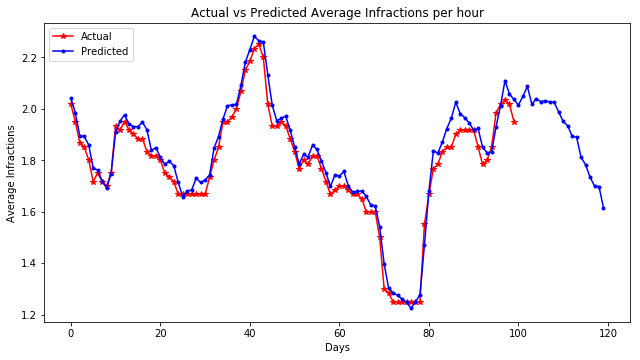

In [107]:
#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(10.5, 5.5))
plt.plot(range(100), df_val['infractions'].loc[29:128], linestyle='-', marker='*', color='r')
plt.plot(range(120), pred_pm25[:120], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Average Infractions per hour')
plt.ylabel('Average Infractions')
plt.xlabel('Days')
#plt.savefig('plots/ch5/B07887_05_09.png', format='png', dpi=300)

In [119]:
df_val = df_average.loc[df_average['TimeStamp']>=split_date]
df_val

,infractions,infractions_scaled,TimeStamp
TimeStamp,,,
2018-02-01 00:00:00,1.650000,0.399194,2018-02-01 00:00:00
2018-02-01 00:30:00,1.600000,0.387097,2018-02-01 00:30:00
2018-02-01 01:00:00,1.500000,0.362903,2018-02-01 01:00:00
2018-02-01 01:30:00,1.466667,0.354839,2018-02-01 01:30:00
2018-02-01 02:00:00,1.383333,0.334677,2018-02-01 02:00:00
2018-02-01 02:30:00,1.383333,0.334677,2018-02-01 02:30:00
2018-02-01 03:00:00,1.383333,0.334677,2018-02-01 03:00:00
2018-02-01 03:30:00,1.383333,0.334677,2018-02-01 03:30:00
2018-02-01 04:00:00,1.383333,0.334677,2018-02-01 04:00:00


In [186]:
prediction = pd.DataFrame(pred_pm25[:190], columns=['infractions'])
prediction.shape

(190, 1)

In [188]:
evaluation = df_val['infractions'][29:219]
prediction.index = evaluation.index

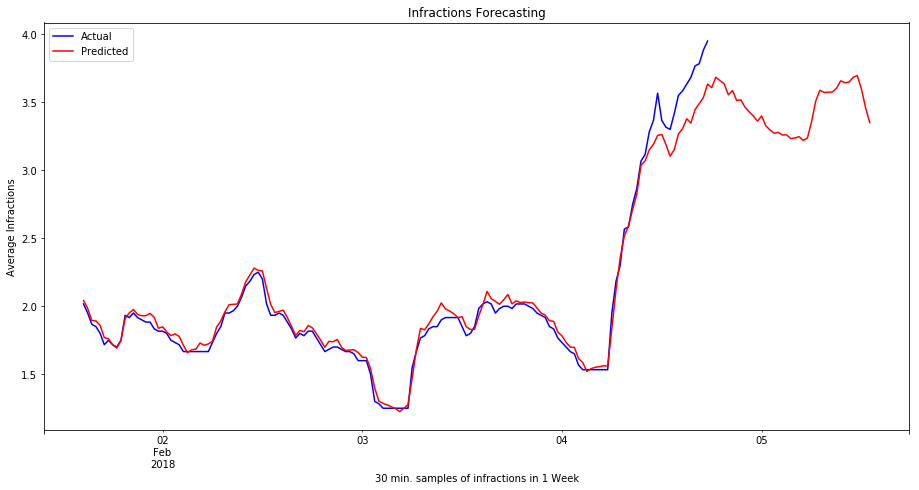

In [189]:
fig = plt.figure(figsize=(15.5, 7.5))
ax = fig.add_subplot(1,1,1)
df_val['infractions'][29:180].plot(ax=ax, color='b')
prediction.plot(ax=ax, color='r')
ax.set_title('Infractions Forecasting')
ax.set_xlabel('30 min. samples of infractions in 1 Week')
ax.set_ylabel('Average Infractions')
plt.legend(['Actual','Predicted'], loc=2)

plt.savefig('plots/30_min_samples.png', format='png', dpi=400)

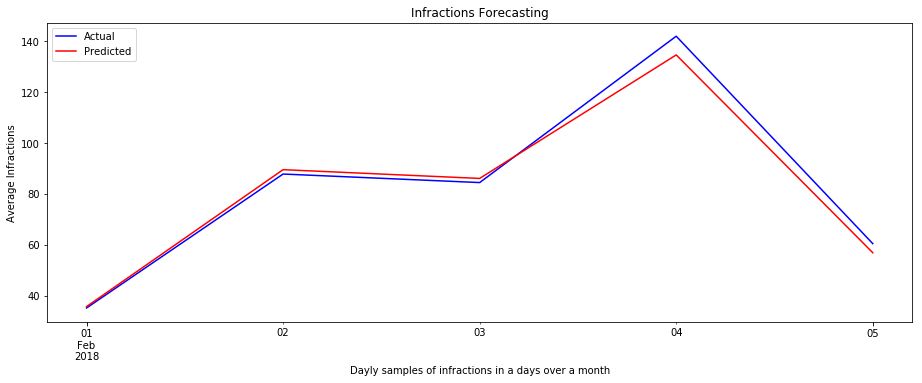

In [184]:
hourly = df_val['infractions'][29:209].resample('D')
hourly_sum = hourly.sum()

hourly_pred = prediction.resample('D')
hourly_pred_sum = hourly_pred.sum()


fig = plt.figure(figsize=(15.5, 5.5))
ax = fig.add_subplot(1,1,1)
hourly_sum.plot(ax=ax, color='b')
hourly_pred_sum.plot(ax=ax, color='r')
ax.set_title('Infractions Forecasting')
ax.set_xlabel('Dayly samples of infractions in a days over a month')
ax.set_ylabel('Average Infractions')
plt.legend(['Actual','Predicted'], loc=2)

plt.savefig('plots/dayli_sample.png', format='png', dpi=300)

# RECURRENT NN

In [8]:
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df[['infractions']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

df['norm'] = df_normalized
df['MAV100'] = df['norm'].rolling(200).mean()

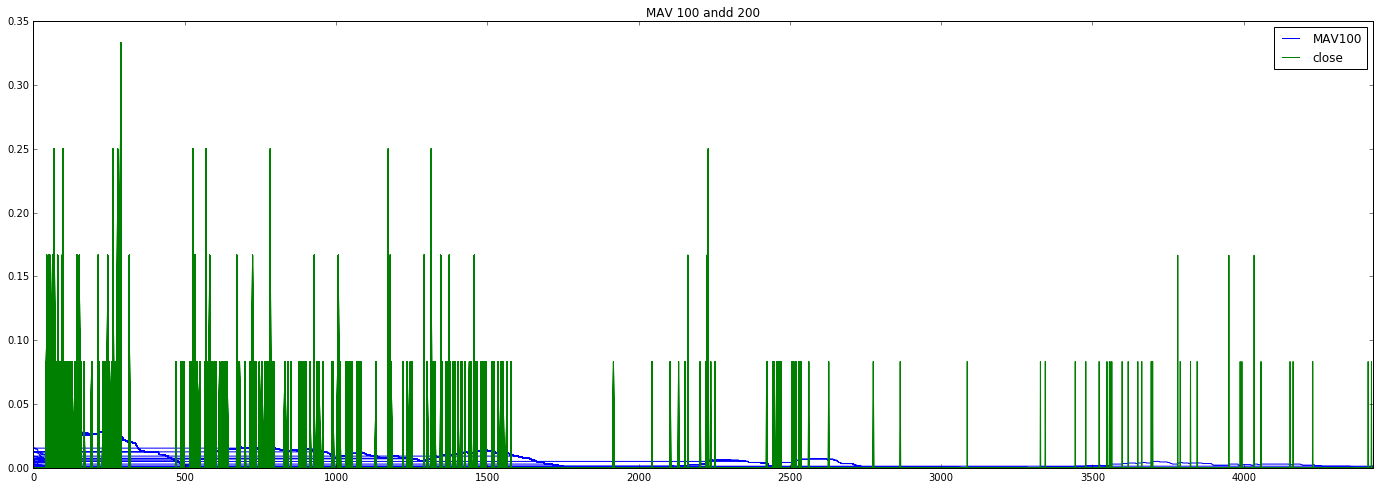

In [10]:
result = pd.DataFrame({'close': df['norm'], 'MAV100': df['MAV100']})
result.plot(title='MAV 100 andd 200')
plt.gcf().set_size_inches(24,8)

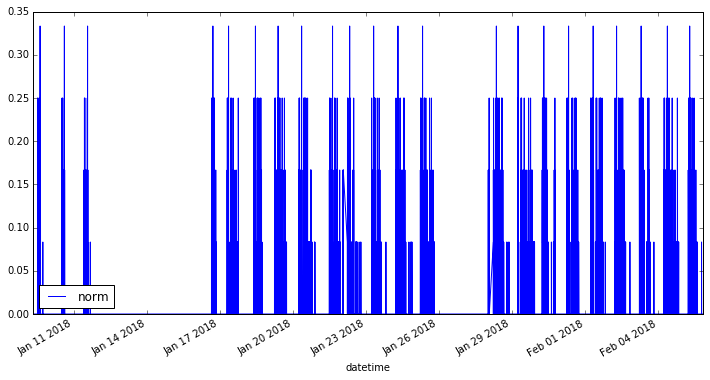

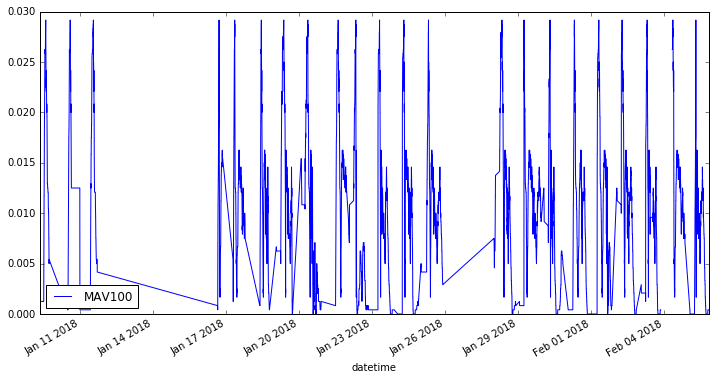

In [11]:
df.plot(x='datetime', y='norm',figsize=(12,6))
df.plot(x='datetime', y='MAV100',figsize=(12,6))

In [12]:
df.head()

,datetime,infractions,norm,MAV100
0,2018-02-04 01:36:04.936250,0,0.0,NaN
1,2018-02-04 01:37:00.188437,0,0.0,NaN
2,2018-02-04 01:38:00.103528,0,0.0,NaN
3,2018-02-04 01:39:00.129788,0,0.0,NaN
4,2018-02-04 01:40:00.025635,0,0.0,NaN


In [13]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [14]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

/home/stanlee321/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [49]:
df_n = df.fillna(0.0001)

In [50]:
raw = list(df_n['MAV100'].values)
y = np.array(raw)
series = pd.DataFrame(y, columns=['inf'])
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(series.values)
series = pd.DataFrame(scaled)

In [51]:
window_size = 50

series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    
series.dropna(axis=0, inplace=True)

In [52]:
series.head()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,...,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429
1,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,...,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429
2,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,...,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429
3,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,...,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429
4,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,...,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429


In [53]:
series.shape

(39246, 51)

In [54]:
nrow = round(0.8*series.shape[0])

In [55]:
train = series.iloc[:nrow, :]
test = series.iloc[nrow:,:]


In [56]:
from sklearn.utils import shuffle
train = shuffle(train)
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [57]:
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values

In [58]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(31397, 50)
(31397,)
(7849, 50)
(7849,)


In [59]:
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)


In [60]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(input_shape = (50,1), output_dim= 50, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

/home/stanlee321/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(50, 1), units=50, return_sequences=True)`
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               314368    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 325,025
Trainable params: 325,025
Non-trainable params: 0
_________________________________________________________________


In [61]:
start = time.time()
model.fit(train_X,train_y,batch_size=512,epochs=3,validation_split=0.1)
print("> Compilation Time : ", time.time() - start)

Train on 28257 samples, validate on 3140 samples
Epoch 1/3
28257/28257 [==============================] - 143s 5ms/step - loss: 0.0114 - val_loss: 5.8576e-04
Epoch 2/3
28257/28257 [==============================] - 149s 5ms/step - loss: 0.0022 - val_loss: 5.3699e-04
Epoch 3/3
28257/28257 [==============================] - 172s 6ms/step - loss: 0.0020 - val_loss: 5.0507e-04
> Compilation Time :  465.57193303108215


In [66]:
test_X.shape

(7849, 50, 1)

In [62]:
# Doing a prediction on all the test data at once
preds = model.predict(test_X)

In [67]:
preds = scaler.inverse_transform(preds.reshape(-1,1))

In [68]:
actuals = scaler.inverse_transform(test_y.reshape(-1,1))
#actuals = test_y

In [69]:
mean_squared_error(actuals,preds)

3.9948150030945625e-07

In [70]:
#actuals = (actuals - np.mean(actuals)) / np.std(actuals)
plt.style.use('ggplot')

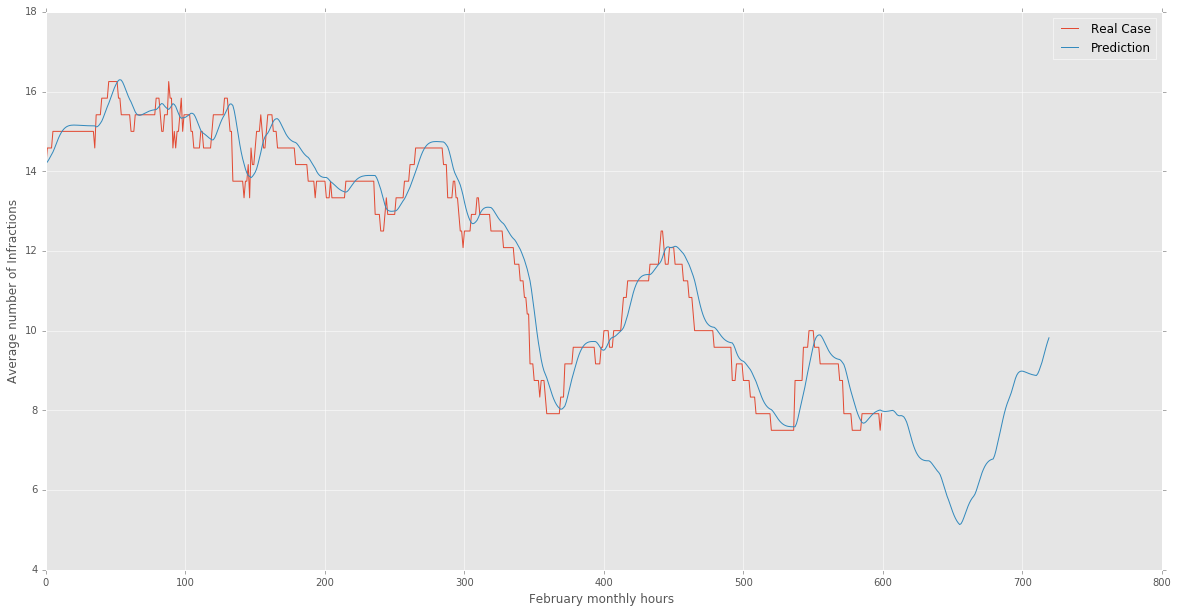

In [117]:

pyplot.figure(figsize=(20,10))
pyplot.xlabel('February monthly hours ')
pyplot.ylabel('Average number of Infractions')
pyplot.plot(actuals[0:600]*1000, label='Real Case')
pyplot.plot(preds[0:720]*1000, label='Prediction')
pyplot.legend()
pyplot.show()

(27,)
(27,)


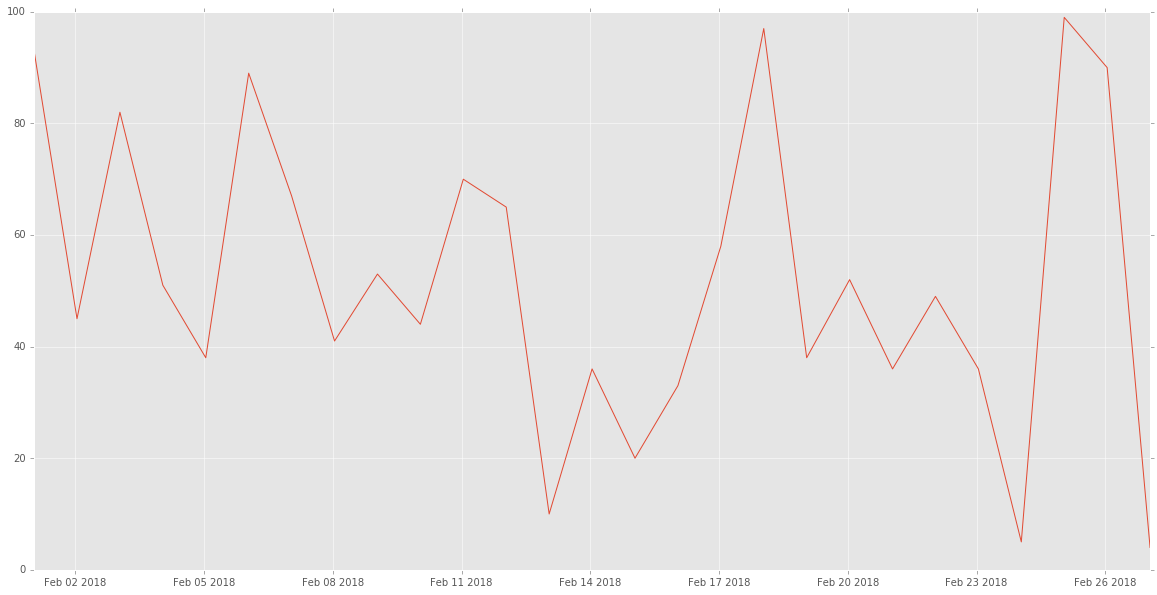

In [115]:
import datetime
x = np.array([datetime.datetime(2018, 2, i, 1, 0) for i in range(1,28)])
print(x.shape)
y = np.random.randint(100, size=x.shape)
#y = preds[0:720]*1000
print(y.shape)
plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.show()

In [98]:
preds2 = model.predict(train_X)

In [99]:
preds2 = scaler.inverse_transform(preds2)

In [106]:
actuals2 = scaler.inverse_transform(train_y.reshape(-1,1))
mean_squared_error(actuals2,preds2)

2.9968498068493816e-05

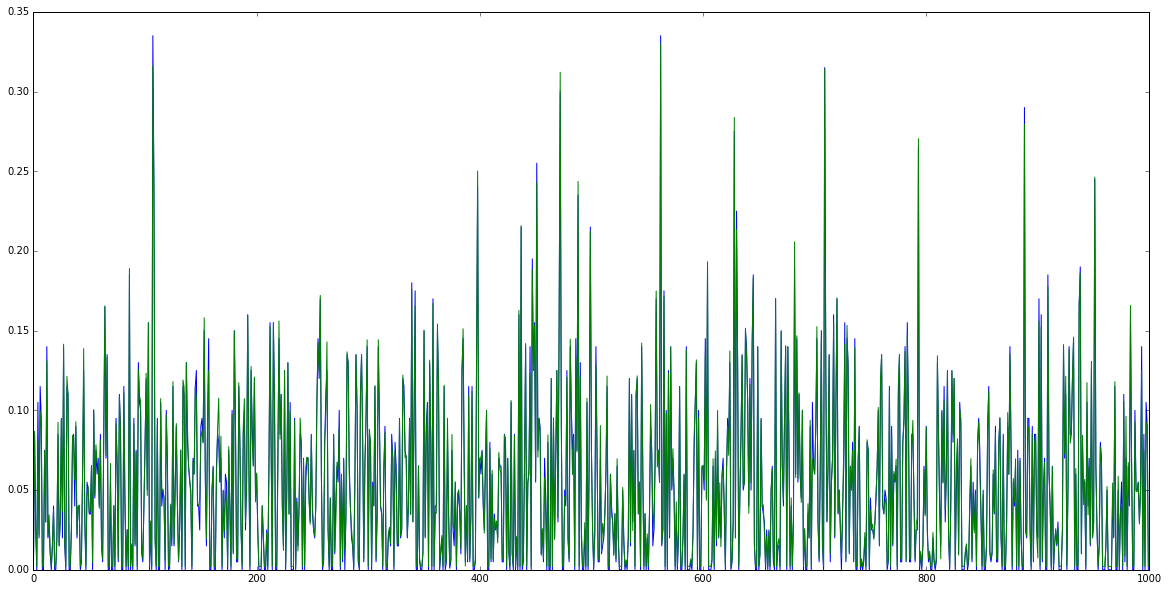

In [108]:
pyplot.figure(figsize=(20,10))
pyplot.plot(actuals2[29000:30000])
pyplot.plot(preds2[29000:30000])
pyplot.show()

In [ ]:
preds_moving = moving_test_window_preds(500)

In [110]:
import numpy as np
from numpy import convolve
import matplotlib.pyplot as plt
 
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma
 
yMA = movingaverage(y,100)
print (yMA)

[0.18 0.18 0.18 ..., 0.060000000000000005 0.060000000000000005
 0.060000000000000005]


In [36]:
def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                    # Use this to store the prediction made on each test window
    moving_test_window = [test_X[0,:].tolist()]          # Creating the first test window
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
        
    preds_moving = scaler.inverse_transform(np.array(preds_moving)reshape(-1,1))
    
    return preds_moving
